In [95]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint
import pandas as pd

## Dados constantes

In [96]:
# Valores constantes
g_0 = 9.8 # m/s^2
H = 3657 # m Altura total do pulo
Cd = 1.2 # Pesquisar uma média
m = 80 # kg massa média
A_0 = 0.5 # m^2 Áre de queda com a pessoa paralela ao solo
A_paraquedas = 24.5 # m^2 Área do paraquedas
pa = 1.2 # kg/m^3 Densidade do ar

## Implementando o modelo

In [97]:
# pa, A, Cd
def modelo(X, t, pa, A, Cd):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    if y <= 1500:
        A = A_paraquedas

    P = m * g_0
    D = (1 / 2) * pa * A * Cd * (vy * vy + vx * vx)
    
    dxdt = vx
    dydt = vy
    
    dvxdt = 0 
    dvydt = (D - P) / m
    
    if y <= 0:
        dydt = 0
        dvydt = 0
    dXdt = [dxdt, dydt, dvxdt, dvydt]
    
    return dXdt


## Implementando condições iniciais e lista de tempo

In [98]:
x_0 = 0
y_0 = H
vx_0 = 0
vy_0 = 0
X_0 = [x_0, y_0, vx_0, vy_0]

t_final = 2 * 60
dt = 0.1
lista_t = np.arange(0, t_final, dt)

## Rodando odeint

In [99]:
Y = odeint(modelo, X_0, lista_t, args=(pa, A_0, Cd))
lista_x = Y[:,0]
lista_y = Y[:,1]
lista_vx = Y[:,2]
lista_vy = Y[:,3]
lista_vy = -lista_vy

## Plotando gráfico de y pelo tempo

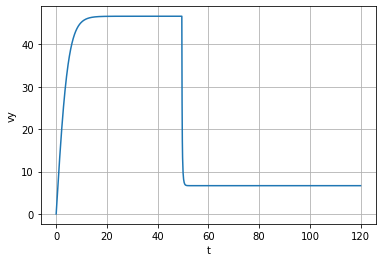

In [100]:
plt.plot(lista_t, lista_vy)
plt.xlabel('t')
plt.ylabel('vy')
plt.grid(True)
plt.show()

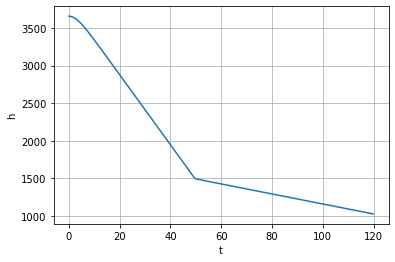

In [101]:
plt.plot(lista_t, lista_y)
plt.xlabel('t')
plt.ylabel('h')
plt.grid(True)
plt.show()

# Segunda iteração: Considere a variação da densidade do ar e a variação do g

In [102]:
# Valores constantes
RE = 6378 * 1000
g_0 = 9.8 # m/s^2
H_0 = 38969 # m Altura total do pulo
Cd = 0.8 # Pesquisar uma média
m = 110 # kg massa média
A_0 = 1 # m^2 Áre de queda com a pessoa paralela ao solo
A_aux = [1] * 100
A_paraquedas = 100 # m^2 Área do paraquedas
pa_0 = 1.2 # kg/m^3 Densidade do ar

In [103]:
def g(y):
    return g_0 / (1 + (y / RE))

def pa_f(y, pa_0):
    return pa_0 * exp((-y) / 7500)

def modelo2(X, t, pa_0, A, Cd):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]

    # condição para abrir o paraquedas 
    if y <= 2502.6 and len(A_aux) > 1:
        A += A_aux[-1]
        A_aux[-2] += A_aux[-1]
        A_aux.pop(len(A_aux) - 1)
        
    if y <= 2502.6 and len(A_aux) == 1:
        A += A_aux[-1]
        
    if y > 28000:
        A = A * 0.6
    
    '''if y <= 2500:
        A = A_paraquedas'''

    P = m * g(y)
    D = (1 / 2) * pa_f(y, pa_0) * A * Cd * (vy * vy + vx * vx)
    
    dxdt = vx
    dydt = vy

    dvxdt = 0 
    dvydt = (D - P) / m
    
    if y <= 0:
        dxdt = 0
        dydt = 0

        dvxdt = 0 
        dvydt = 0

    dXdt = [dxdt, dydt, dvxdt, dvydt]
    return dXdt

In [104]:
x_0 = 0
y_0 = H_0
vx_0 = 0
vy_0 = 0
X_0 = [x_0, y_0, vx_0, vy_0]

t_final_2 = 520
dt_2 = 0.1
lista_t_2 = np.arange(0, t_final_2, dt)

In [105]:
Y = odeint(modelo2, X_0, lista_t_2, args=(pa_0, A_0, Cd))
lista_x_2 = Y[:,0]
lista_y_2 = Y[:,1]
lista_vx_2 = Y[:,2]
lista_vy_2 = -Y[:,3] * 3.6
#lista_vy_2 = -lista_vy_2

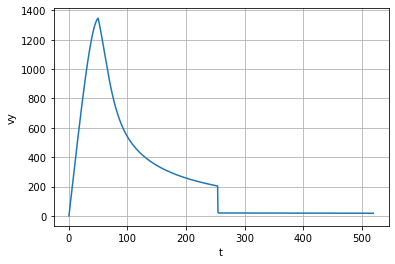

18.24965415261452


In [106]:
plt.plot(lista_t_2, lista_vy_2)
plt.xlabel('t')
plt.ylabel('vy')
#plt.axis([-5, 60, -5, 70])
plt.grid(True)
plt.show()
print(lista_vy_2[-1])

In [107]:
v_max = max(lista_vy_2)
aux = list(lista_vy_2)
i_max = aux.index(v_max)
t_para_v_max = lista_t[i_max]
print(f'Velocidade maxima: {v_max:.2f} km/h')
print(f'Tempo para atingir velocidade maxima: {t_para_v_max:.2f} segundos')

Velocidade maxima: 1346.71 km/h
Tempo para atingir velocidade maxima: 49.90 segundos


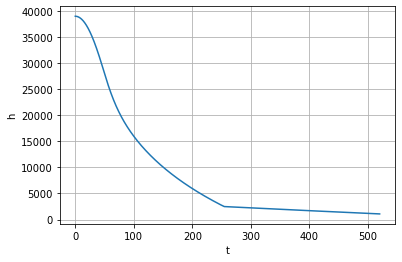

In [108]:
plt.plot(lista_t_2, lista_y_2)
plt.xlabel('t')
plt.ylabel('h')
plt.grid(True)
plt.show()

## Validação:

In [109]:
# Transformando de tsv para csv
with open("dados_red_bull.tsv", 'r', encoding='utf-8') as arquivo1:
    conteudo = arquivo1.read()
    conteudo = conteudo.replace("\t", ",")
    #print(conteudo)
with open("dados_red_bull.csv", "w", encoding="utf-8") as arquivo2:
    arquivo2.write(conteudo)

In [110]:
colunas = ['t', 'y', 'vy']
data = pd.read_csv('dados_red_bull.csv', names=colunas)

te = data.t.tolist()
ye = data.y.tolist()
vye = data.vy.tolist()

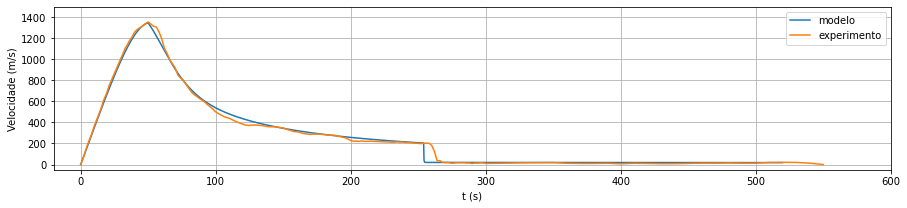

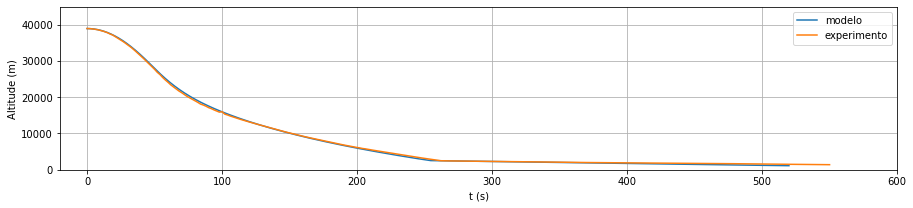

In [111]:
plt.figure(figsize=(15, 3))
plt.plot(lista_t_2, lista_vy_2, label='modelo')
plt.plot(te, vye, label='experimento')
plt.xlabel('t (s)')
plt.ylabel('Velocidade (m/s)')
plt.axis([-20, 600, -50, 1500])
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(lista_t_2, lista_y_2, label='modelo')
plt.plot(te, ye, label='experimento')
plt.xlabel('t (s)')
plt.ylabel('Altitude (m)')
plt.axis([-20, 600, -50, 45000])
plt.legend()
plt.grid(True)
plt.show()

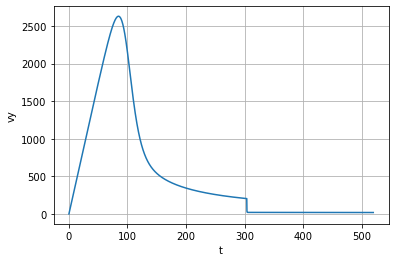

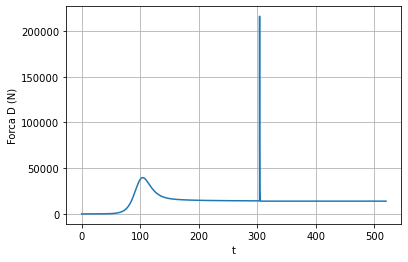

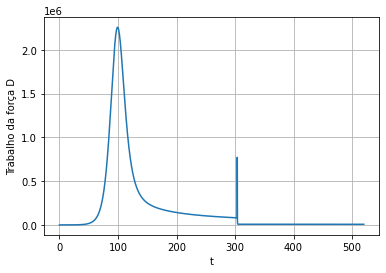

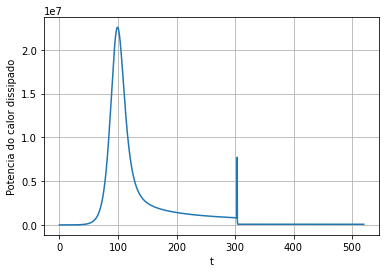

In [112]:
# Valores constantes
RE = 6378 * 1000
g_0 = 9.8 # m/s^2
#H_0 = 38969 # m Altura total do pulo
H_0 = 75000
Cd = 0.8 # Pesquisar uma média
m = 110 # kg massa média
A_0 = 1 # m^2 Áre de queda com a pessoa paralela ao solo
A_aux = [1] * 100
A_paraquedas = 100 # m^2 Área do paraquedas
pa_0 = 1.2 # kg/m^3 Densidade do ar

def g(y):
    return g_0 / (1 + (y / RE))

def pa_f(y, pa_0):
    return pa_0 * exp((-y) / 7500)

def modelo2(X, t, pa_0, A, Cd):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]

    # condição para abrir o paraquedas 
    '''if y <= 2502.6 and len(A_aux) > 1:
        A += A_aux[-1]
        A_aux[-2] += A_aux[-1]
        A_aux.pop(len(A_aux) - 1)
        
    if y <= 2502.6 and len(A_aux) == 1:
        A += A_aux[-1]
        
    if y > 28000:
        A = A * 0.6'''
    
    if y <= 2500:
        A = A_paraquedas

    P = m * g(y)
    D = (1 / 2) * pa_f(y, pa_0) * A * Cd * (vy * vy + vx * vx)
    
    dxdt = vx
    dydt = vy

    dvxdt = 0 
    dvydt = (D - P) / m
    
    if y <= 0:
        dxdt = 0
        dydt = 0

        dvxdt = 0 
        dvydt = 0

    dXdt = [dxdt, dydt, dvxdt, dvydt]
    return dXdt

x_0 = 0
y_0 = H_0
vx_0 = 0
vy_0 = 0
X_0 = [0, H_0, 0, 0]

t_final_2 = 520
dt_2 = 0.1
lista_t_2 = np.arange(0, t_final_2, dt)

Y = odeint(modelo2, X_0, lista_t_2, args=(pa_0, A_0, Cd))
lista_x_2 = Y[:,0]
lista_y_2 = Y[:,1]
lista_vx_2 = Y[:,2]
lista_vy_2 = -Y[:,3] * 3.6
#lista_vy_2 = -lista_vy_2
lista_p = Y[:,3] * m # Quantidade de movimento

# Lista da forca D
forca_D = []
A = 1
Cd = 0.8
for i in range(len(lista_vy_2)):
    y = lista_y_2[i]
    vy = lista_vy_2[i]
    if y <= 2500:
        A = A_paraquedas
    D = (1 / 2) * pa_f(y, pa_0) * A * Cd * (vy * vy)
    forca_D.append(D)

trabalho_D = [-forca_D[i + 1] * (lista_y_2[i + 1] - lista_y_2[i]) for i in range(0, len(lista_f) - 1)]
trabalho_D.append(trabalho_D[-1])
potencia_D = [trabalho_D[i + 1] / (lista_t_2[i + 1] - lista_t_2[i]) for i in range(0, len(lista_f) - 1)]
potencia_D.append(potencia_D[-1])

plt.plot(lista_t_2, lista_vy_2)
plt.xlabel('t')
plt.ylabel('vy')
#plt.axis([-5, 60, -5, 70])
plt.grid(True)
plt.show()

plt.plot(lista_t_2, forca_D)
plt.xlabel('t')
plt.ylabel('Forca D (N)')
#plt.axis([-5, 60, -5, 70])
plt.grid(True)
plt.show()

plt.plot(lista_t_2, trabalho_D)
plt.xlabel('t')
plt.ylabel('Trabalho da força D')
#plt.axis([-5, 60, -5, 70])
plt.grid(True)
plt.show()

plt.plot(lista_t_2, potencia_D)
plt.xlabel('t')
plt.ylabel('Potencia do calor dissipado')
#plt.axis([-5, 60, -5, 70])
plt.grid(True)
plt.show()

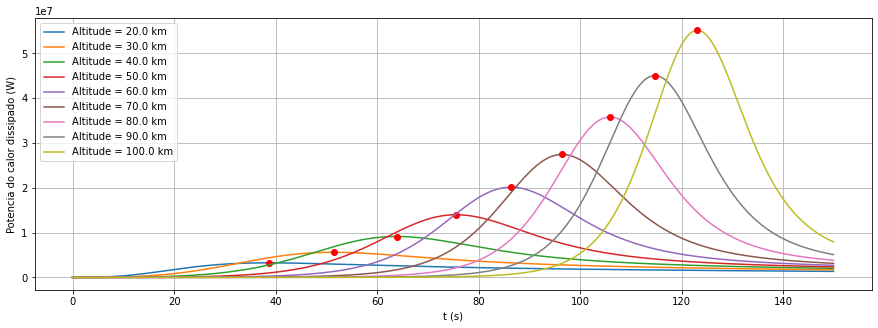

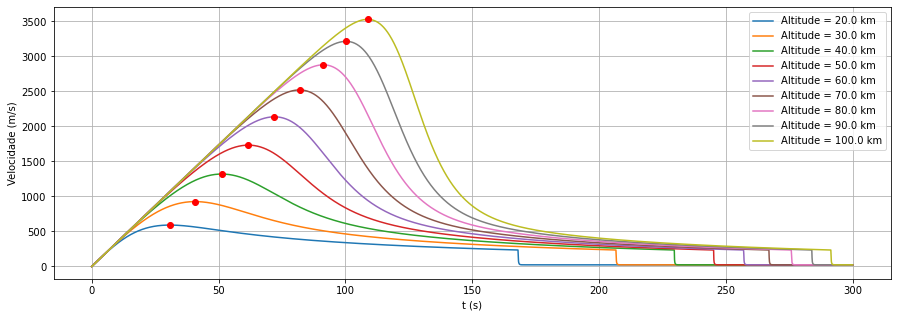

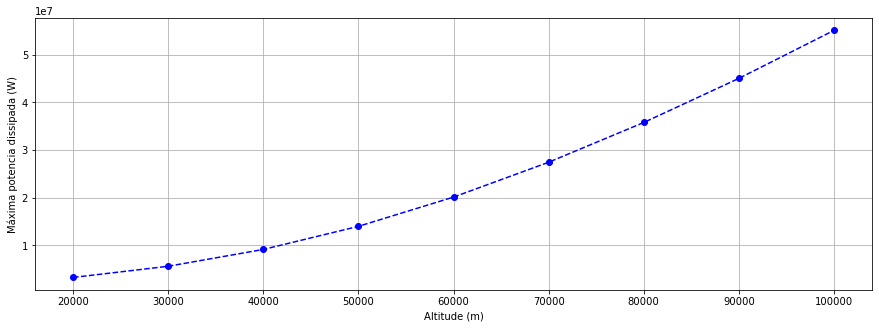

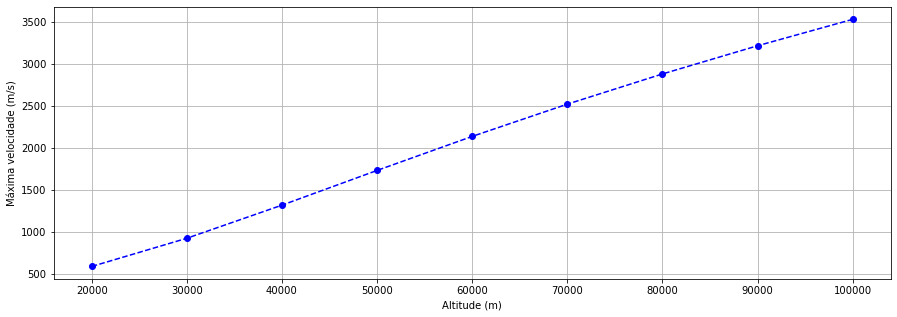

In [145]:
X_0 = [0, H_0, 0, 0]
Hs = np.arange(20000, 100001, 10000)
gs = np.arange(5, 10.01, 0.5)

picos_de_potencia = []
picos_de_velocidade = []
plt.figure(figsize=(15, 5))
for i in range(len(Hs)):
    X_0 = [0, Hs[i], 0, 0]
    
    Y = odeint(modelo2, X_0, lista_t_2, args=(pa_0, A_0, Cd))
    lista_x_2 = Y[:,0]
    lista_y_2 = Y[:,1]
    lista_vx_2 = Y[:,2]
    lista_vy_2 = -Y[:,3] * 3.6

    # Lista da forca D
    forca_D = []
    A = 1
    Cd = 0.8
    for j in range(len(lista_vy_2)):
        y = lista_y_2[j]
        vy = lista_vy_2[j]
        if y <= 2500:
            A = A_paraquedas
        D = (1 / 2) * pa_f(y, pa_0) * A * Cd * (vy * vy)
        forca_D.append(D)
        
    trabalho_D = [-forca_D[i + 1] * (lista_y_2[i + 1] - lista_y_2[i]) for i in range(0, len(lista_f) - 1)]
    trabalho_D.append(trabalho_D[-1])
    potencia_D = [trabalho_D[i + 1] / (lista_t_2[i + 1] - lista_t_2[i]) for i in range(0, len(lista_f) - 1)]
    potencia_D.append(potencia_D[-1])
    max_pot = max(potencia_D[0:1500])
    picos_de_potencia.append(max_pot)
    picos_de_velocidade.append(max(lista_vy_2[0:1500]))
    plt.plot(lista_t_2[0:1500], potencia_D[0:1500], label=f'Altitude = {Hs[i] / 1000} km')
    for jj in range(len(potencia_D[0:1500])):
        if potencia_D[jj] == max_pot:
            t_max_0 = lista_t_2[jj]
    plt.plot(t_max_0, picos_de_potencia[-1], 'ro')
    
plt.xlabel('t (s)')
plt.ylabel('Potencia do calor dissipado (W)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
for i in range(len(Hs)):
    X_0 = [0, Hs[i], 0, 0]
    Y = odeint(modelo2, X_0, lista_t_2, args=(pa_0, A_0, Cd))
    lista_x_2 = Y[:,0]
    lista_y_2 = Y[:,1]
    lista_vx_2 = Y[:,2]
    lista_vy_2 = -Y[:,3] * 3.6
    max_v = max(lista_vy_2)
    plt.plot(lista_t_2[0:3000], lista_vy_2[0:3000], label=f'Altitude = {Hs[i] / 1000} km')
    for j in range(len(lista_t_2)):
        if lista_vy_2[j] == max_v:
            t_max = lista_t_2[j]
    plt.plot(t_max, max_v, 'ro')
plt.xlabel('t (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(Hs, picos_de_potencia, 'bo--')
plt.xlabel('Altitude (m)')
plt.ylabel('Máxima potencia dissipada (W)')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(Hs, picos_de_velocidade, 'bo--')
plt.xlabel('Altitude (m)')
plt.ylabel('Máxima velocidade (m/s)')
plt.grid(True)
plt.show()

In [147]:
X_0 = [0, H_0, 0, 0]
Hs = np.arange(20000, 100001, 10000)
ms = np.arange(60, 150, 5)
cds = np.arange(0.8, 1.0, 0.01)
pas = np.arange(0.5, 1.51, 0.1)
g_0 = 9.8

picos_de_potencia_2 = []
picos_de_velocidade_2 = []
lista_de_pontos = []
plt.figure(figsize=(15, 5))
for j in range(len(ms)):
    for i in range(len(Hs)):
        Cd = 0.8
        m = ms[j]
        H_0 = Hs[i]
        pa_0 = 1.2
        X_0 = [0, H_0, 0, 0]

        Y = odeint(modelo2, X_0, lista_t_2, args=(pa_0, A_0, Cd))
        lista_y_2 = Y[:,1]
        lista_vy_2 = -Y[:,3] * 3.6

        # Lista da forca D
        forca_D = []
        A = 1
        Cd = 0.8
        for jj in range(len(lista_vy_2)):
            y = lista_y_2[jj]
            vy = lista_vy_2[jj]
            '''if y <= 2500:
                A = A_paraquedas'''
            D = (1 / 2) * pa_f(y, pa_0) * A * Cd * (vy * vy)
            forca_D.append(D)

        trabalho_D = [-forca_D[i + 1] * (lista_y_2[i + 1] - lista_y_2[i]) for i in range(0, len(lista_f) - 1)]
        trabalho_D.append(trabalho_D[-1])
        potencia_D = [trabalho_D[i + 1] / (lista_t_2[i + 1] - lista_t_2[i]) for i in range(0, len(lista_f) - 1)]
        potencia_D.append(potencia_D[-1])

        picos_de_potencia_2.append(max(potencia_D))
        picos_de_velocidade_2.append(max(lista_vy_2))

        lista_de_pontos.append((Hs[i], ms[j], picos_de_velocidade_2[-1], picos_de_potencia_2[-1]))



x, y, z, k = [], [], [], []
for i in range(len(lista_de_pontos)):
    x.append(lista_de_pontos[i][0])
    y.append(lista_de_pontos[i][1])
    z.append(lista_de_pontos[i][2])
    k.append(lista_de_pontos[i][3])
k_new = list(k)
z_new = list(z)
x_new = list(x)
y_new = list(y)

import plotly.graph_objects as go

layout = go.Layout(title='Máxima velocidade',
                   yaxis={'title':'m (kg)'},
                   xaxis={'title': 'Altitude (m)'})

'''fig = go.Figure(data =
    go.Contour(
        z=z_new,
        x=x_new, # horizontal axis
        y=y_new, # vertical axis
        contours=dict(
            start=0,
            end=140000000,
            size=10000000,
    )), layout=layout)'''

'''fig = go.Figure(data =
    go.Contour(
        z=z_new,
        x=x_new, # horizontal axis
        y=y_new, # vertical axis
        ), layout=layout)'''

'''layout = go.Layout(title='Tempo de resfriamento em função de R e h',
                   yaxis={'title':'h (m)'},
                   xaxis={'title': 'R (m)'})'''

fig2 = go.Figure(data =
    go.Contour(
        z=z,
        x=x_new, # horizontal axis
        y=y_new, # vertical axis
    ), layout=layout)

fig2.show()

<Figure size 1080x360 with 0 Axes>

In [149]:
layout = go.Layout(title='Máxima potência dissipada',
                   yaxis={'title':'m (kg)'},
                   xaxis={'title': 'Altitude (m)'})

fig3 = go.Figure(data =
    go.Contour(
        z=k_new,
        x=x_new, # horizontal axis
        y=y_new, # vertical axis
        ), layout=layout)
fig3.show()